In [3]:
# Data processing and visualization
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning and metrics
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report
)


In [4]:
# Image dimensions and dataset path
IMG_SIZE = 64
DATASET_DIR = "glass_no_glass/train"

# Label mapping
CATEGORIES = {
    "with_glasses": 1,
    "without_glasses": 0
}


In [5]:
# Function to read, convert, resize and flatten images
def load_images_from_folder(folder_path, label):
    data = []
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        img = cv2.imread(img_path)

        if img is not None:
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
            resized = cv2.resize(gray, (IMG_SIZE, IMG_SIZE))  # Resize to uniform size
            flattened = resized.flatten()  # Flatten image to 1D array
            data.append([flattened, label])  # Add with label
    return data


In [6]:
# Load and label data from both folders
all_data = []
for category in CATEGORIES:
    folder_path = os.path.join(DATASET_DIR, category)
    label = CATEGORIES[category]
    all_data.extend(load_images_from_folder(folder_path, label))


In [7]:
# Separate features and labels
features = [item[0] for item in all_data]
labels = [item[1] for item in all_data]

# Create DataFrame
df = pd.DataFrame(features)
df['label'] = labels


print("Dataset shape:", df.shape)
df.head()


Dataset shape: (74879, 4097)


,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,label
0,206,206,207,205,206,206,207,206,208,207,...,194,192,193,194,193,191,190,189,190,1
1,205,205,206,206,205,206,206,206,206,206,...,194,194,194,193,194,194,192,192,192,1
2,191,189,185,191,186,132,144,152,153,168,...,230,219,220,227,228,171,146,140,139,1
3,108,106,103,100,96,93,81,81,89,101,...,64,66,86,91,89,94,92,99,98,1
4,169,168,170,169,172,170,171,171,172,171,...,151,152,154,153,147,148,147,146,145,1


In [11]:
# Separate input and output columns
X = df.drop('label', axis=1)
y = df['label']

# Apply PCA to reduce dimensionality
pca = PCA(n_components=100)
X_pca = pca.fit_transform(X)


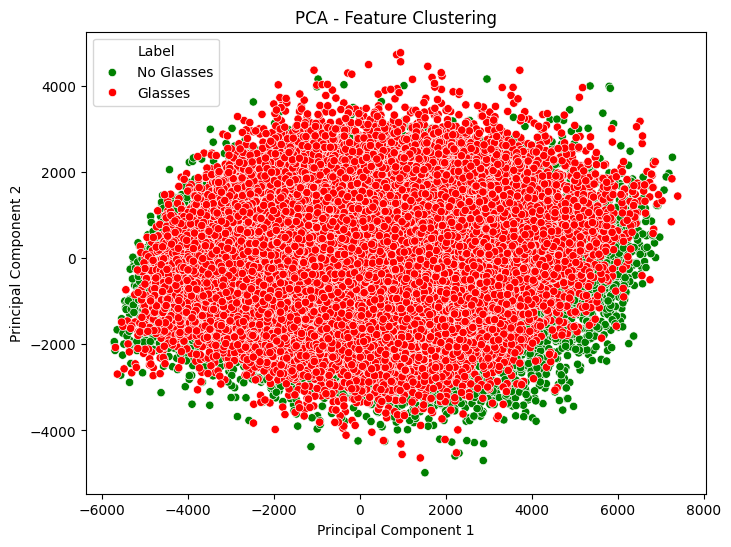

In [12]:
#PCA 2D Scatter Plot (Feature Clustering)
# PCA for Visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# PCA DataFrame
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['label'] = y.values

# Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='label', palette=['red', 'green'])
plt.title("PCA - Feature Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title='Label', labels=['No Glasses', 'Glasses'])
plt.show()

In [13]:
# Split 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.2, random_state=42
)


In [14]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_test)


In [15]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)
knn_preds = knn_model.predict(X_test)


In [16]:
def evaluate_model(name, y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()

    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    specificity = tn / (tn + fp)
    f1 = f1_score(y_true, y_pred)

    print(f"\n{name} Evaluation:")
    print(f"True Positive (TP): {tp}")
    print(f"True Negative (TN): {tn}")
    print(f"False Positive (FP): {fp}")
    print(f"False Negative (FN): {fn}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Sensitivity (Recall): {recall:.4f}")
    print(f"Specificity: {specificity:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("Classification Report:\n", classification_report(y_true, y_pred))


In [17]:
evaluate_model("Decision Tree", y_test, dt_preds)
evaluate_model("K-Nearest Neighbors", y_test, knn_preds)



Decision Tree Evaluation:
True Positive (TP): 2220
True Negative (TN): 6235
False Positive (FP): 3344
False Negative (FN): 3177
Accuracy: 0.5646
Sensitivity (Recall): 0.4113
Specificity: 0.6509
Precision: 0.3990
F1 Score: 0.4051
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.65      0.66      9579
           1       0.40      0.41      0.41      5397

    accuracy                           0.56     14976
   macro avg       0.53      0.53      0.53     14976
weighted avg       0.57      0.56      0.57     14976


K-Nearest Neighbors Evaluation:
True Positive (TP): 1969
True Negative (TN): 6914
False Positive (FP): 2665
False Negative (FN): 3428
Accuracy: 0.5931
Sensitivity (Recall): 0.3648
Specificity: 0.7218
Precision: 0.4249
F1 Score: 0.3926
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.72      0.69      9579
           1       0.42      0.36      0.39      5

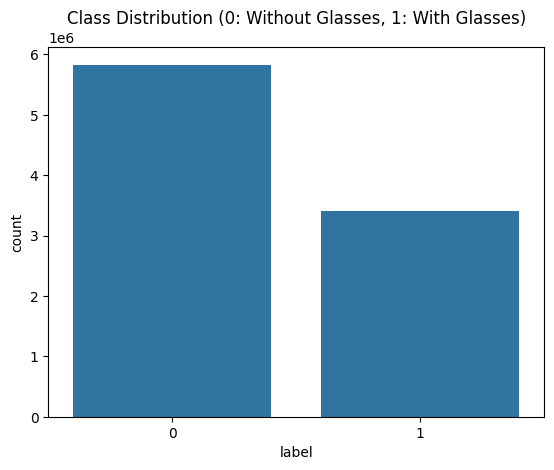

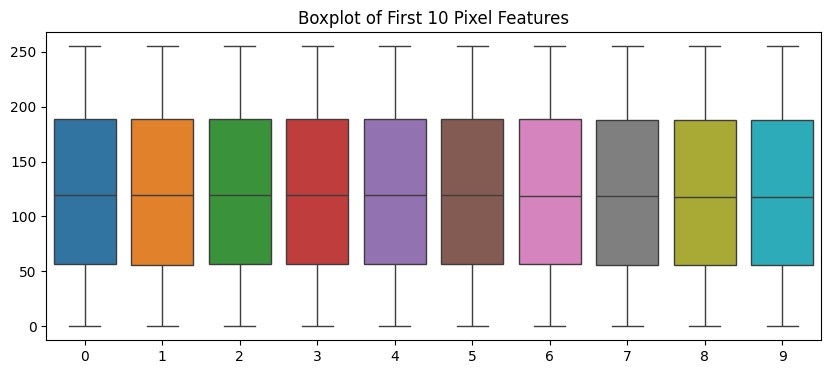

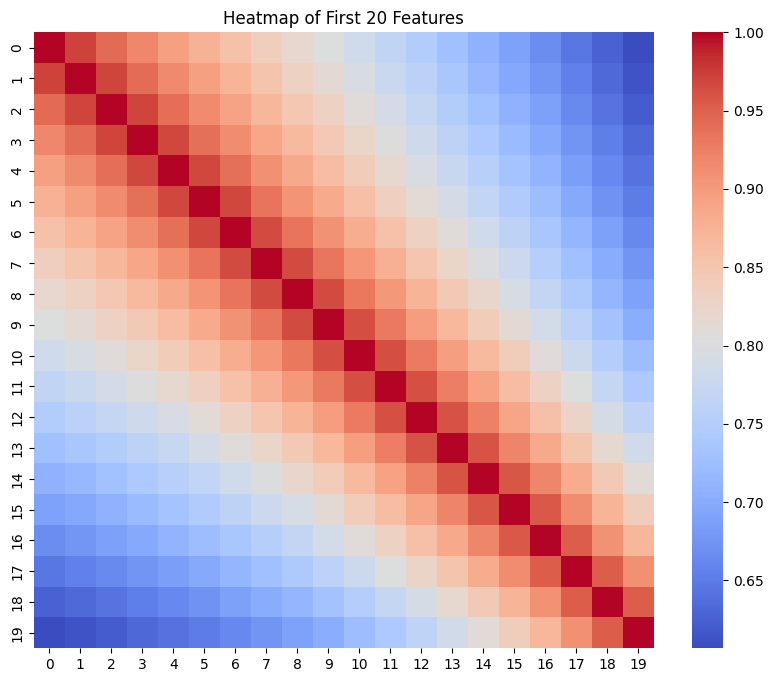

In [19]:
#  Check class distribution
sns.countplot(data=df, x='label')
plt.title('Class Distribution (0: Without Glasses, 1: With Glasses)')
plt.show()

#  Box plot of some sample features
plt.figure(figsize=(10, 4))
sns.boxplot(data=df.iloc[:, :10])  # just first 10 features for visualization
plt.title("Boxplot of First 10 Pixel Features")
plt.show()

#  Correlation heatmap (first 20 features)
plt.figure(figsize=(10, 8))
sns.heatmap(df.iloc[:, :20].corr(), cmap='coolwarm', annot=False)
plt.title("Heatmap of First 20 Features")
plt.show()


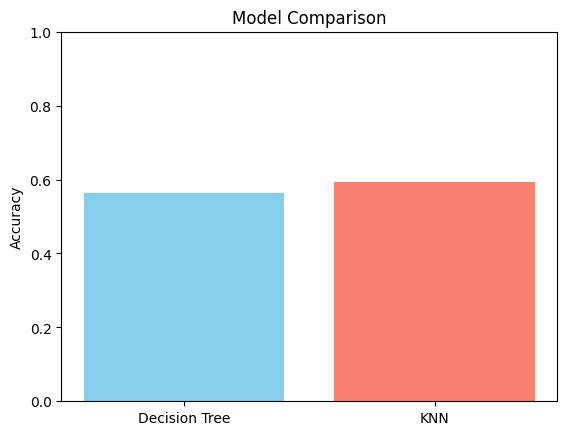

In [21]:
#  Compare Predictions Bar Chart
labels = ['Decision Tree', 'KNN']
scores = [accuracy_score(y_test, dt_preds), accuracy_score(y_test, knn_preds)]

plt.bar(labels, scores, color=['skyblue', 'salmon'])
plt.ylabel("Accuracy")
plt.title("Model Comparison")
plt.ylim(0, 1)
plt.show()


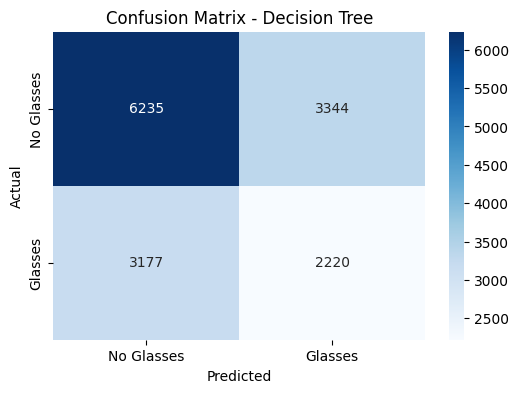

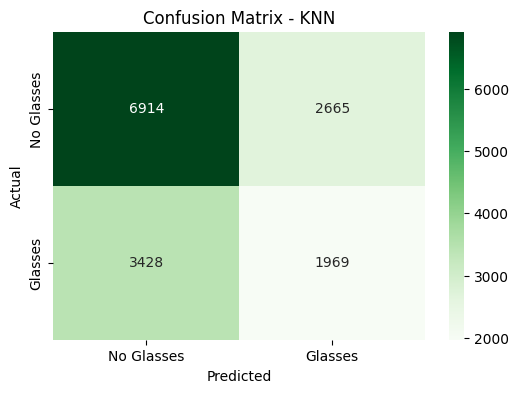

In [23]:
#Confusion Matrix Heatmaps (Decision Tree & KNN)

import seaborn as sns
from sklearn.metrics import confusion_matrix

# Decision Tree Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, dt_preds), annot=True, fmt='d', cmap='Blues', xticklabels=['No Glasses', 'Glasses'], yticklabels=['No Glasses', 'Glasses'])
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# KNN Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, knn_preds), annot=True, fmt='d', cmap='Greens', xticklabels=['No Glasses', 'Glasses'], yticklabels=['No Glasses', 'Glasses'])
plt.title("Confusion Matrix - KNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


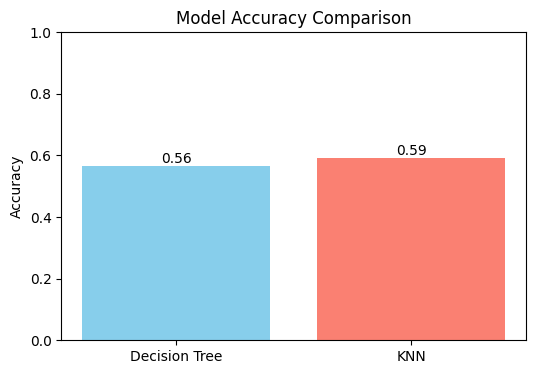

In [25]:
#Accuracy Bar Chart (Model Comparison)
#  Compare Accuracy Scores
labels = ['Decision Tree', 'KNN']
scores = [accuracy_score(y_test, dt_preds), accuracy_score(y_test, knn_preds)]

plt.figure(figsize=(6, 4))
plt.bar(labels, scores, color=['skyblue', 'salmon'])
plt.ylim(0, 1)
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
for i, v in enumerate(scores):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center')
plt.show()


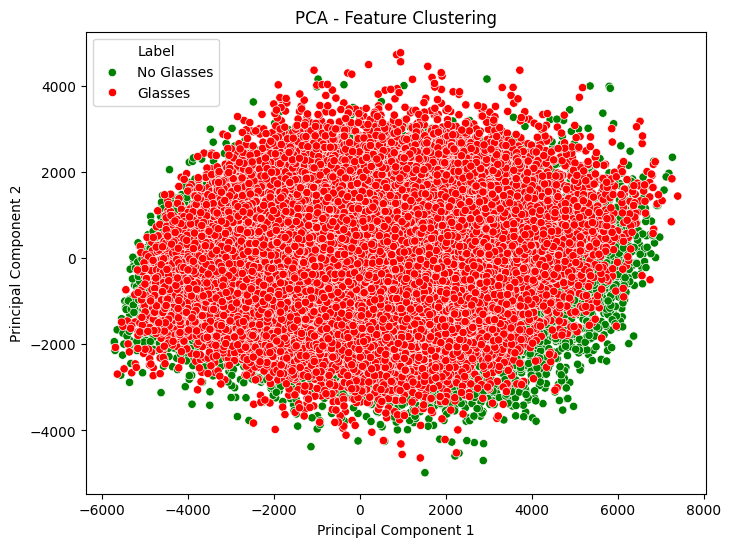

In [27]:
#PCA 2D Scatter Plot (Feature Clustering)
# PCA for Visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# PCA DataFrame
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['label'] = y.values

# Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='label', palette=['red', 'green'])
plt.title("PCA - Feature Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title='Label', labels=['No Glasses', 'Glasses'])
plt.show()
